<a href="https://colab.research.google.com/github/Hanaelhamrawy/DataAnalysis-Projects/blob/main/Telecom_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Customer Churn Project**


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/Hanaelhamrawy/DataAnalysis-Projects/main/Python/telecom_churn.csv')

df.head()

<ipython-input-1-257d8d6e4e37>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## Data Inspection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('telecom_churn')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')


In [3]:
#Check for any inconsistencies per column
for column in df.columns:
    print(f"Value counts for {column}:\n{df[column].value_counts()}\n")

Value counts for customerID:
customerID
7590-VHVEG    1
9128-CPXKI    1
0961-ZWLVI    1
6595-COKXZ    1
5760-FXFVO    1
             ..
7089-RKVSZ    1
0020-INWCK    1
7874-ECPQJ    1
9796-MVYXX    1
3186-AJIEK    1
Name: count, Length: 6976, dtype: int64

Value counts for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64

Value counts for SeniorCitizen:
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

Value counts for Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Value counts for Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Value counts for tenure:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

Value counts for PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Value counts for MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone serv

In [4]:
#To display our data
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
#To get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [6]:
#To get the descriptive statistics of the dataset
print(df.describe())

       SeniorCitizen       tenure
count    7032.000000  7032.000000
mean        0.162400    32.421786
std         0.368844    24.545260
min         0.000000     1.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000


## Data Cleaning

In [7]:
# Display the dataset before cleaning
print("Original Dataset:")
print(df.head())

Original Dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies   

In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64


In [9]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)


Duplicate Rows:
0


In [10]:
# Fix the data types

# Convert 'SeniorCitizen' to object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# Remove non-numeric characters from 'MonthlyCharges' and 'TotalCharges' columns
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'].astype(str).str.replace('$', '').str.replace('/m', ''), errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].astype(str).str.replace('$', ''), errors='coerce')

# Impute missing values in 'TotalCharges' with the mean of non-null values in the column
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [11]:
# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df.head())
print(df.info())


Cleaned Dataset:
   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female             0     Yes         No       1           No   
1  5575-GNVDE    Male             0      No         No      34          Yes   
2  3668-QPYBK    Male             0      No         No       2          Yes   
3  7795-CFOCW    Male             0      No         No      45           No   
4  9237-HQITU  Female             0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        C

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [12]:
# Drop 'customerID' column
df = df.drop(columns=['customerID']) #Reason is that it is unneeded and won't affect anything.

In [13]:
#Correlation Heatmap
# Encode categorical variables using one-hot encoding
#Justify: One hot encoding is suitable for nominal values which is the case in this dataset.
df_encoded = pd.get_dummies(df, drop_first=True)

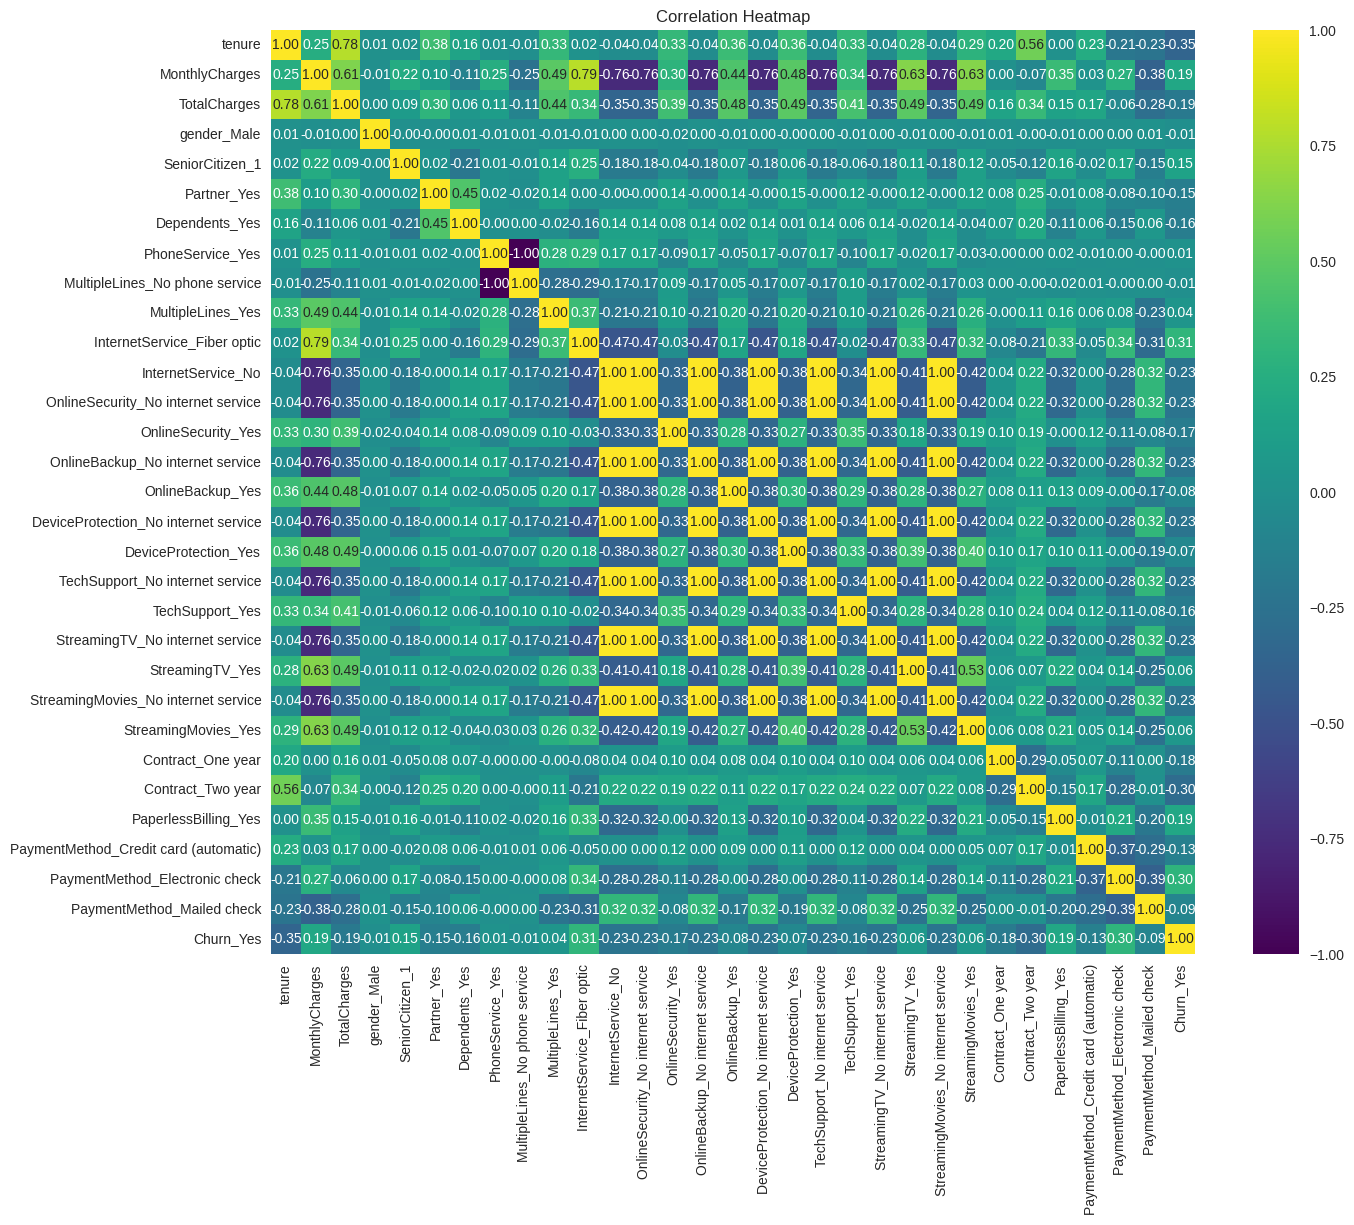

In [14]:
# Calculate the correlation matrix for the entire dataset
plt.figure(figsize=(15, 12))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

**Answer for Q1**: In the heatmap above, the scale on the right side shows a gradient from light blue to dark blue. The darker the color, the more correlated an attribute is.
When we look at the churn column, we can see that the highest values are tenure (-0.35) and contract with a value of (-0.30), and hence they indicate a strong negative correlation with the churn.




**Q2: Which payment method has the highest churn rate?**

**Visualization**

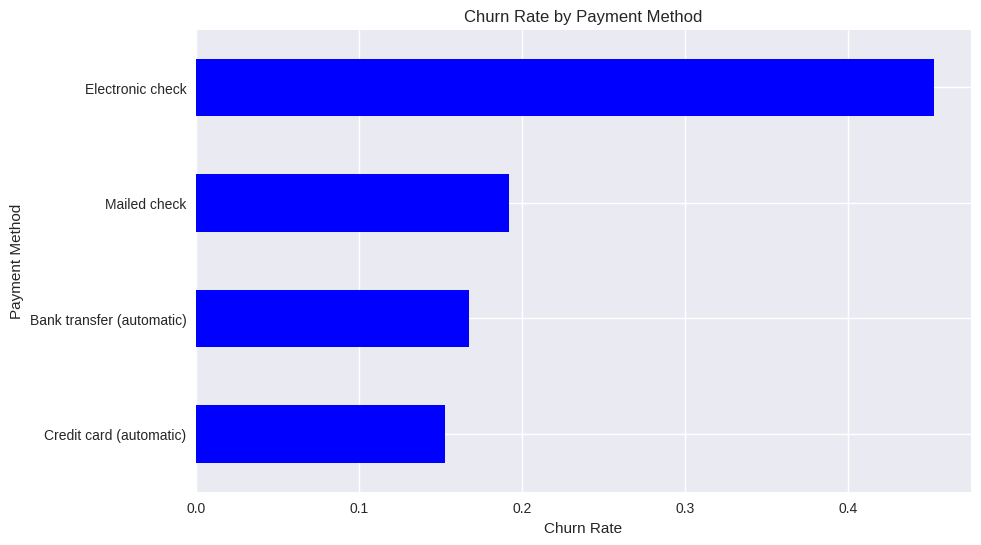

In [15]:
# Calculate churn rates for each payment method
payment_churn_rates = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).loc[:, 'Yes']

# Plot the churn rates for each payment method
plt.figure(figsize=(10, 6))
payment_churn_rates.sort_values().plot(kind='barh', color='blue')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Churn Rate')
plt.ylabel('Payment Method')
plt.show()


**Answer for Q2**: According to the visual above, electronic checks have the highest churn rate with a value of approx 0.47



**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

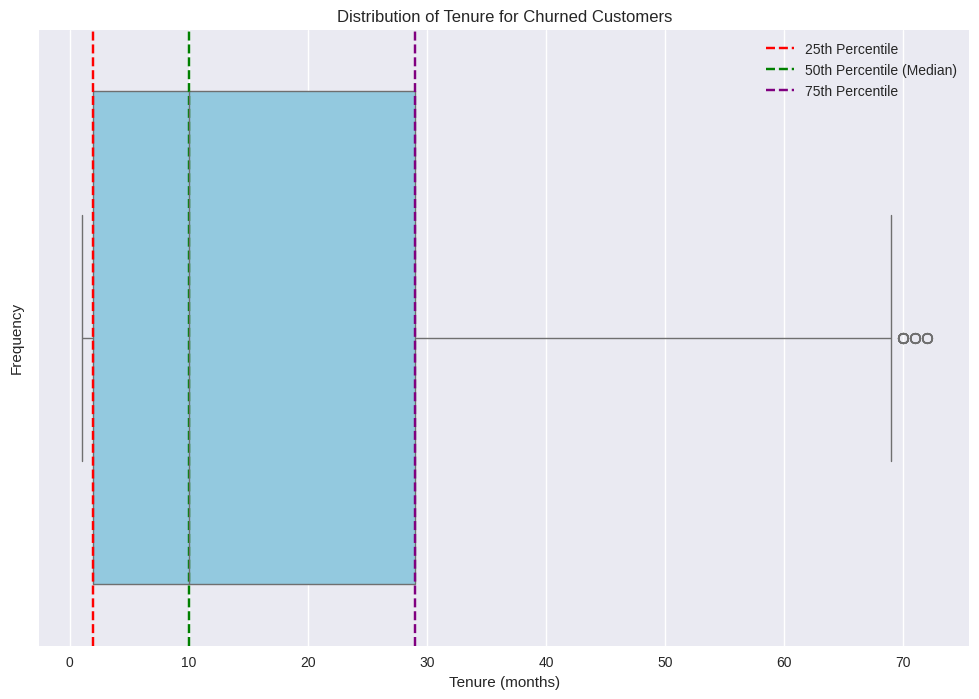

In [16]:
# Calculate the 25th, 50th (median), and 75th percentiles of tenure for churned customers
percentiles = df[df['Churn'] == 'Yes']['tenure'].describe(percentiles=[0.25, 0.5, 0.75])

# Plot boxplots for the distribution of tenure at 25%, 50%, and 75%
plt.figure(figsize=(12, 8))
sns.boxplot(x=df[df['Churn'] == 'Yes']['tenure'], color='skyblue')
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')

# Add horizontal lines for the percentiles
plt.axvline(x=percentiles['25%'], color='red', linestyle='--', label='25th Percentile')
plt.axvline(x=percentiles['50%'], color='green', linestyle='--', label='50th Percentile (Median)')
plt.axvline(x=percentiles['75%'], color='purple', linestyle='--', label='75th Percentile')

plt.legend()
plt.show()


**Answer for Q3**: This barplot is divided into 3 quartiles, q1 which represents 25% indicates that customers churn after about 2 months. While q2 which represents 50% indicates that customers churn after 10 months. And finally, q3 which represents 75% indicates that customers churn after about 29 months.

## Data Preparation for Modelling

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Preprocessing
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_transformer = StandardScaler()

categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                         'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                         'Contract', 'PaperlessBilling', 'PaymentMethod']

categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
encoded_data = preprocessor.fit_transform(df)
encoded_cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(encoded_cat_feature_names)
encoded_df = pd.DataFrame(encoded_data, columns=all_feature_names)

# Display the encoded DataFrame
print(encoded_df.head())


     tenure  MonthlyCharges  TotalCharges  gender_Male  SeniorCitizen_1  \
0 -1.280248       -1.161694     -1.057669          0.0              0.0   
1  0.064303       -0.260878     -0.184303          1.0              0.0   
2 -1.239504       -0.363923     -1.020897          1.0              0.0   
3  0.512486       -0.747850     -0.207198          1.0              0.0   
4 -1.239504        0.196178     -1.000467          0.0              0.0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0          1.0             0.0               0.0   
1          0.0             0.0               1.0   
2          0.0             0.0               1.0   
3          0.0             0.0               0.0   
4          0.0             0.0               1.0   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                             1.0                0.0  ...   
1                             0.0                0.0  ...   
2                             0.0                0.0 

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Contract'] = label_encoder.fit_transform(df['Contract'])
#label encoding as contract can be an ordinal attribute (month-to-month or 1 year or 2 year)

## Modelling

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Pipeline
model = LogisticRegression(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(classification_rep)



Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.86      0.86      1033
         Yes       0.61      0.59      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



### Tree Visualization

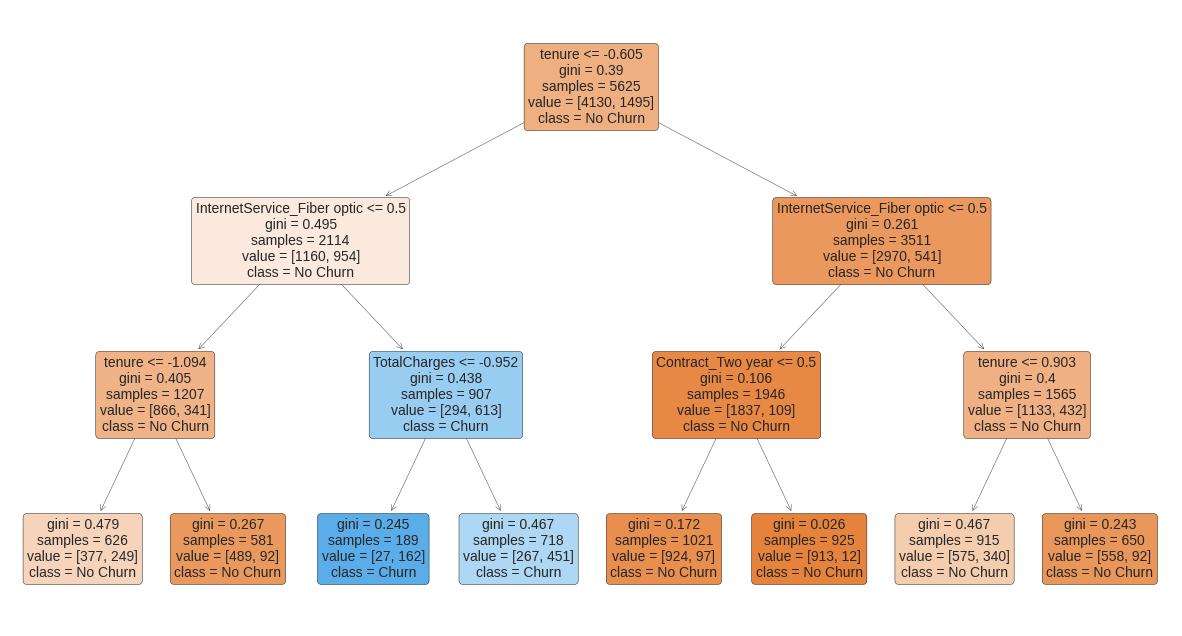

In [21]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define numeric features transformer
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_transformer = StandardScaler()

# Define categorical features transformer
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                         'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                         'Contract', 'PaperlessBilling', 'PaymentMethod']
categorical_transformer = OneHotEncoder(drop='first')  # Using drop='first' to avoid multicollinearity

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with a classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=3))  # Set max_depth to limit the depth of the tree
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get feature names after one-hot encoding
feature_names = numeric_features + list(model.named_steps['preprocessor']
                                        .named_transformers_['cat']
                                        .get_feature_names_out(categorical_features))
# Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(model.named_steps['classifier'], filled=True, feature_names=feature_names, class_names=['No Churn', 'Churn'], rounded=True, fontsize=10)
plt.show()


## Evaluation

Model Accuracy: 0.79

Precision: 0.61
Recall: 0.59


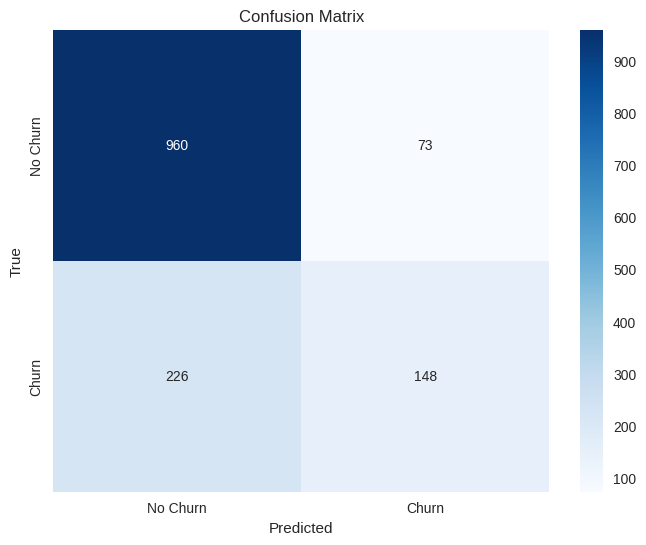

In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# get the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# precision and recall from the classification report
precision = classification_rep.split('\n')[3].split()[1]
recall = classification_rep.split('\n')[3].split()[2]

print(f'\nPrecision: {precision}')
print(f'Recall: {recall}')

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
